### Convolutional Neural Networks - CNNs
CNNs are kind of inspired by the visual cortex. However, that's kind of an oversimplification. Neural networks function VERY differently from the brain. We don't learn by optimizing an objective function. We just learn :'D...all we are doing when we train a CNN is finding the right set of kernels using backpropagation and gradient descent. These kernels are used to extract features from the input image. Of course, we can manually initialize kernels in a specific way to extract features for classification or any other ML task, but it's ridiculously ineffecient would take a LOOONNGG time. Instead, we let gradient descent do the work. CNNs are represented in two dimensions, but in reality they are just sparsely connected dense layers. Instead of connecting every neuron to every other neuron (as in dense layers), we only connect some neurons with each other (i.e, we use a single set of kernels that slide over the image - the kernels are the "neurons").

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import Image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

### LeNet-5
A classic CNN architecture!

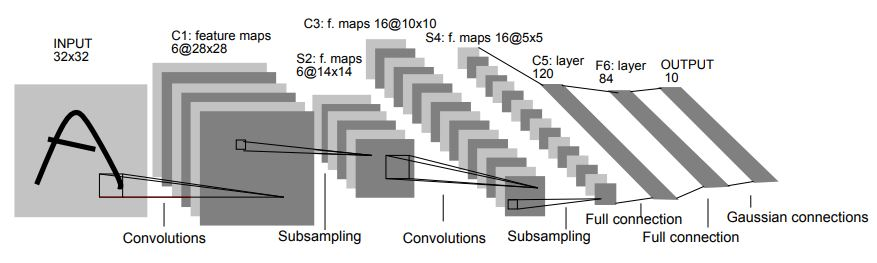

In [3]:
Image(filename='LeNet-5.jpg')

### Fukushima's neocognitron
The first neural network that utilized image feature extraction and inspired CNNs. The name sounds cool but it's just a really crude version of modern CNNs and it doesn't utilize backpropagation and gradient descent. 

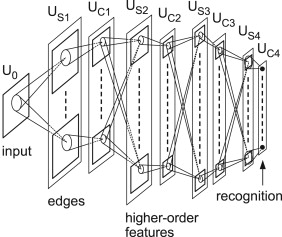

In [4]:
Image(filename="Neocognitron.jpg")

### CNN forward and backward pass

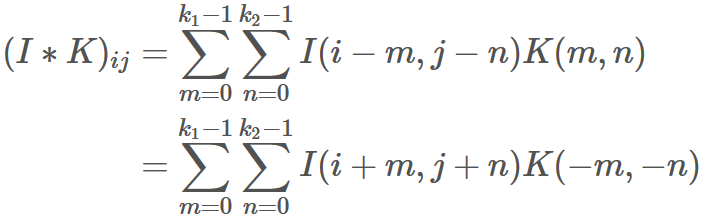

In [5]:
Image(filename="Convolution.png")

In [6]:
def CNNforward(image, kernels, bias, strides):
    input_dim, kernels_dim, output_dim = np.shape(image), np.shape(kernels), np.shape(bias)
    n_kernels, y, x = kernels_dim[0], kernels_dim[1], kernels_dim[2]
    conv = np.zeros(output_dim)
    for i in range(output_dim[0]):
        r = i * strides[0]
        for j in range(output_dim[1]):
            c = j * strides[1]
            conv[i][j] += np.sum(image[r:r + y, c:c + x] * kernels)
    return conv + bias

In [7]:
def CNNbackward(error, image, kernels, strides):
    output_dim, input_dim, kernels_dim = np.shape(error), np.shape(image), np.shape(kernels)
    n_kernels, y, x = kernels_dim[0], kernels_dim[1], kernels_dim[2]
    dK, _error_ = np.zeros((y, x)), np.zeros(input_dim)
    kernel_sum = np.sum(kernels, axis=0)
    for i in range(output_dim[0]):
        r = i * strides[0]
        for j in range(output_dim[1]):
            c = j * strides[1]
            section = image[r:r + y, c:c + x]
            dK += error[i][j] * section
            _error_[r:r + y, c:c + x] = error[i][j] * kernel_sum
    kernels_grad = np.array([dK for i in range(n_kernels)])
    return kernels_grad, _error_

### 1

In [8]:
image = x_train[0]
lr, beta, epochs = 2e-2, 0.9, 100
strides = (7, 7)
kernels, bias = np.random.uniform(1e-2, 1e-1, (2, 7, 7)), np.random.uniform(1e-2, 1e-1, (2, 2))
bias_grad, kernels_grad = np.zeros((2, 2)), np.zeros((2, 7, 7))
target = np.array([[0.5, 0.5], [0.5, 0.5]])

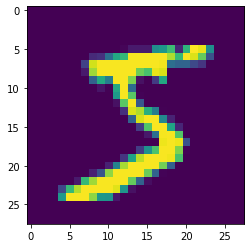

In [9]:
plt.imshow(image)

In [10]:
CNNforward(image, kernels, bias, strides)

array([[0.07666825, 0.38492964],
       [0.0258194 , 2.71196579]])

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1887.88it/s]


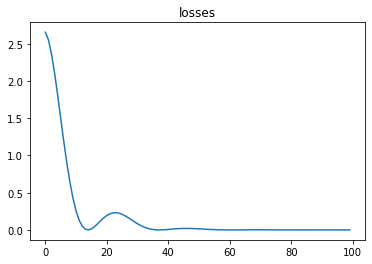

In [11]:
# training!
losses, errors = [], []
for _ in tqdm(range(epochs)):
    output = CNNforward(image, kernels, bias, strides)
    error = output - target
    losses.append(0.5 * np.sum(error ** 2))
    bias_grad = beta * bias_grad + error
    grad, _error_ = CNNbackward(bias_grad, image, kernels, strides)
    errors.append(_error_)
    kernals_grad = beta * kernels_grad + grad
    bias, kernels = bias - lr * bias_grad, kernels - lr * kernels_grad
plt.title('losses')
plt.plot(losses)

In [12]:
CNNforward(image, kernels, bias, strides)

array([[0.49821011, 0.49951347],
       [0.49799511, 0.50935244]])

In [13]:
target

array([[0.5, 0.5],
       [0.5, 0.5]])

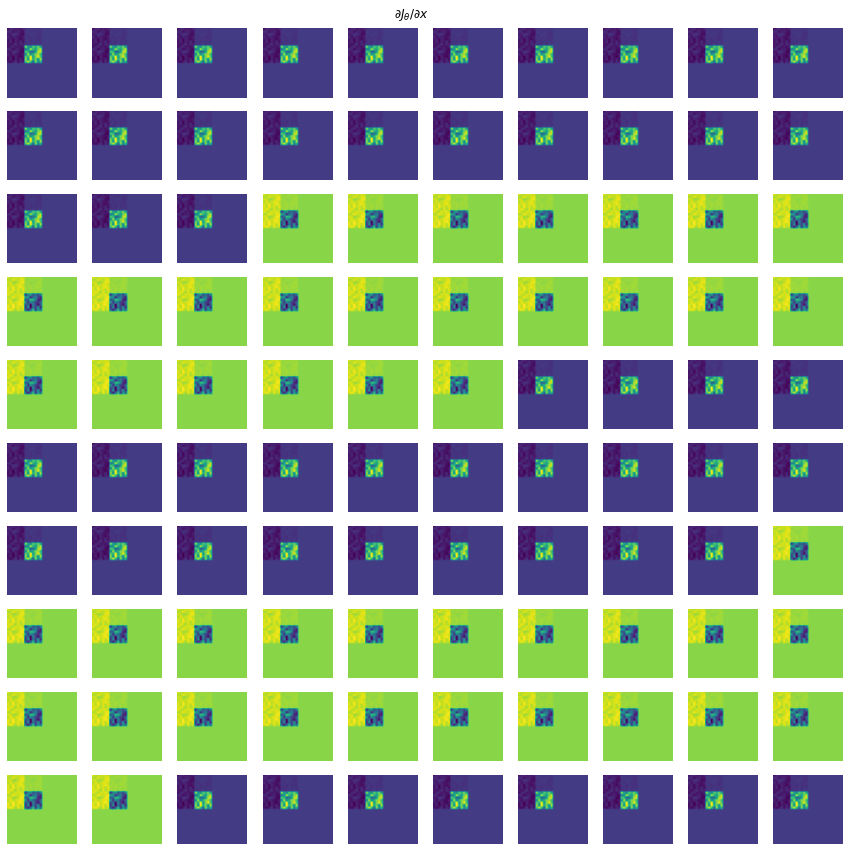

In [14]:
fig = plt.figure(figsize=(15, 15))
plt.suptitle(r'$\partial J_{\theta}/\partial x$', y=0.9)
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(errors[i])
    plt.axis('off')
plt.show()

### 2

In [15]:
image = x_train[100]
lr, beta, epochs = 2e-2, 0.9, 100
strides = (2, 4)
kernels, bias = np.random.uniform(1e-2, 1e-1, (2, 2, 4)), np.random.uniform(1e-2, 1e-1, (14, 7))
bias_grad, kernels_grad = np.zeros((14, 7)), np.zeros((2, 2, 4))
target = np.random.choice(np.arange(0, 1, 0.1), size=(14, 7))

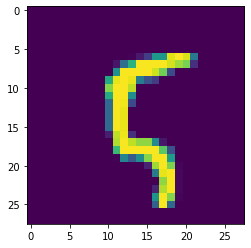

In [16]:
plt.imshow(image)

In [17]:
CNNforward(image, kernels, bias, strides)

array([[0.01574466, 0.06879663, 0.07141995, 0.08482027, 0.07511711,
        0.03934783, 0.09066241],
       [0.04962802, 0.06503456, 0.03503199, 0.02458272, 0.05755172,
        0.04652583, 0.05373802],
       [0.02576449, 0.07933368, 0.06656672, 0.02796907, 0.0750528 ,
        0.07363687, 0.07186572],
       [0.06622905, 0.04130092, 0.06558626, 0.3928398 , 0.79879482,
        0.35610472, 0.07207832],
       [0.06933348, 0.09559756, 0.24982253, 0.81966679, 0.29940883,
        0.08641701, 0.05791991],
       [0.06660595, 0.03842766, 0.41953354, 0.39984378, 0.04623937,
        0.09085986, 0.06269814],
       [0.02109352, 0.01682971, 0.31981721, 0.35725585, 0.09472583,
        0.06772317, 0.09803798],
       [0.06234061, 0.03074873, 0.29959068, 0.32217859, 0.06060976,
        0.04707396, 0.0876091 ],
       [0.07262391, 0.08918461, 0.22697547, 0.58709617, 0.12896054,
        0.06822375, 0.04428861],
       [0.02416347, 0.01361547, 0.12168378, 0.7193993 , 0.57404335,
        0.07826685, 0.0

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 158.57it/s]


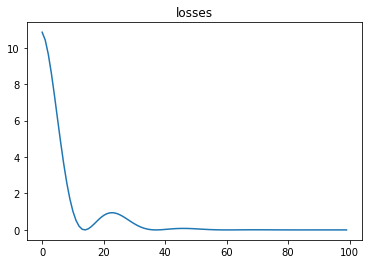

In [18]:
# training!
losses, errors = [], []
for _ in tqdm(range(epochs)):
    output = CNNforward(image, kernels, bias, strides)
    error = output - target
    losses.append(0.5 * np.sum(error ** 2))
    bias_grad = beta * bias_grad + error
    grad, _error_ = CNNbackward(bias_grad, image, kernels, strides)
    errors.append(_error_)
    kernals_grad = beta * kernels_grad + grad
    bias, kernels = bias - lr * bias_grad, kernels - lr * kernels_grad
plt.title('losses')
plt.plot(losses)

In [19]:
CNNforward(image, kernels, bias, strides)

array([[8.96261268e-01, 7.96908389e-01, 3.01971679e-04, 7.96976139e-01,
        5.97780735e-01, 6.97206687e-01, 8.96578029e-01],
       [8.96404531e-01, 6.97315294e-01, 7.96765628e-01, 1.03938516e-04,
        9.98205238e-02, 1.99351094e-01, 4.98113154e-01],
       [1.08935203e-04, 2.99066998e-01, 2.99013018e-01, 8.96312954e-01,
        3.17331784e-04, 7.96928854e-01, 6.97344177e-01],
       [2.99011590e-01, 1.74624994e-04, 7.96894815e-01, 2.00815349e-01,
        7.99994904e-01, 8.97700349e-01, 4.98190698e-01],
       [6.97333470e-01, 9.99813860e-02, 2.00210655e-01, 3.02197210e-01,
        3.99574689e-01, 6.97405701e-01, 2.44891985e-04],
       [3.98590372e-01, 5.97625608e-01, 4.99659779e-01, 5.99153717e-01,
        2.98927071e-01, 8.96578863e-01, 5.97728227e-01],
       [1.99243563e-01, 5.97534290e-01, 5.98815355e-01, 8.97705216e-01,
        2.99132077e-01, 2.86341272e-04, 4.98300459e-01],
       [9.98407718e-02, 4.98015952e-01, 2.00421081e-01, 1.36220773e-03,
        2.56264958e-04, 8

In [20]:
target

array([[0.9, 0.8, 0. , 0.8, 0.6, 0.7, 0.9],
       [0.9, 0.7, 0.8, 0. , 0.1, 0.2, 0.5],
       [0. , 0.3, 0.3, 0.9, 0. , 0.8, 0.7],
       [0.3, 0. , 0.8, 0.2, 0.8, 0.9, 0.5],
       [0.7, 0.1, 0.2, 0.3, 0.4, 0.7, 0. ],
       [0.4, 0.6, 0.5, 0.6, 0.3, 0.9, 0.6],
       [0.2, 0.6, 0.6, 0.9, 0.3, 0. , 0.5],
       [0.1, 0.5, 0.2, 0. , 0. , 0.9, 0.7],
       [0.9, 0.4, 0.3, 0.4, 0.2, 0.5, 0.6],
       [0.9, 0.6, 0.7, 0.8, 0.5, 0. , 0.2],
       [0. , 0.7, 0.9, 0.1, 0.5, 0.9, 0. ],
       [0.8, 0.5, 0.9, 0. , 0.4, 0.7, 0.3],
       [0.1, 0.3, 0.8, 0.5, 0.4, 0.2, 0. ],
       [0.5, 0.2, 0.7, 0.8, 0.1, 0.1, 0.6]])

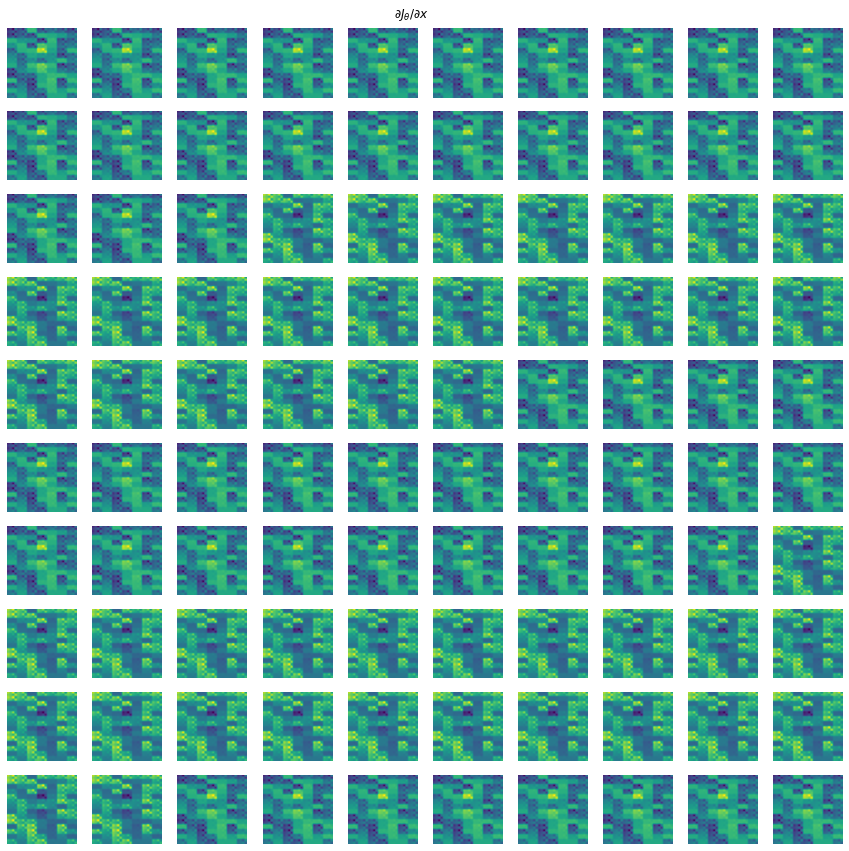

In [21]:
fig = plt.figure(figsize=(15, 15))
plt.suptitle(r'$\partial J_{\theta}/\partial x$', y=0.9)
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(errors[i])
    plt.axis('off')
    # plt.savefig(f'converrors{i}.png')
plt.show()

### Viewing Kernels

In [22]:
kernels

array([[[0.09350802, 0.08292683, 0.09393572, 0.03547861],
        [0.0457337 , 0.02473184, 0.04874484, 0.09016119]],

       [[0.03734781, 0.02435951, 0.06365777, 0.02289807],
        [0.0640415 , 0.07411612, 0.02547901, 0.04047696]]])

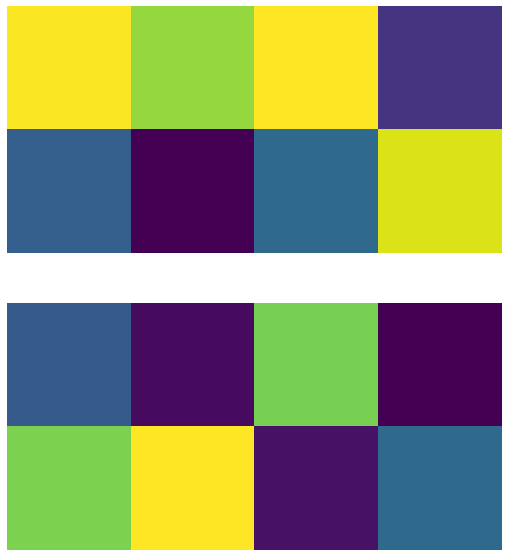

In [23]:
fig = plt.figure(figsize=(10, 10))
for i in range(np.shape(kernels)[0]):
    plt.subplot(2, 1, i + 1)
    plt.imshow(kernels[i])
    plt.axis('off')
plt.show()

### Pooling 
Very simple function!

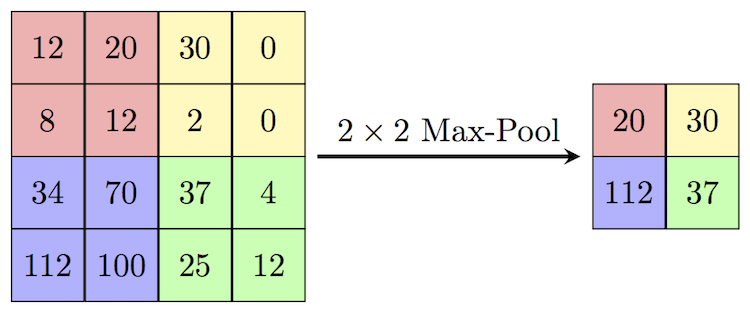

In [24]:
Image(filename='pool.png')

In [25]:
def POOLforward(image, pool_size, strides):
    input_dim = np.shape(image)
    y, x = pool_size[0], pool_size[1]
    output_dim = (int((input_dim[0] - y) / strides[0]) + 1, int((input_dim[1] - x) / strides[1]) + 1)
    output = np.zeros(output_dim)
    indices = []
    for i in range(output_dim[0]):
        r = i * strides[0]
        for j in range(output_dim[1]):
            c = j * strides[1]
            val, ind = -69420666, (0, 0)
            for k in range(y):
                for l in range(x):
                    if val < image[r + k][c + l]:
                        val, ind = image[r + k][c + l], (r + k, c + l)
            output[i][j] = val
            indices.append(ind)
    return output, indices

In [26]:
def POOLbackward(error, indices, pool_size, strides):
    input_dim = np.shape(error)
    output_dim = ((input_dim[0] - 1) * strides[0] + pool_size[0], (input_dim[1] - 1) * strides[1] + pool_size[1])
    _error_ = np.zeros(output_dim)
    ct = 0
    for i in range(input_dim[0]):
        for j in range(input_dim[1]):
            _error_[indices[ct][0]][indices[ct][1]] = error[i][j]
            ct += 1
    return _error_

In [27]:
image = x_train[200]
pool_size, strides = (2, 2), (2, 4)
target = np.random.choice(np.arange(0, 1, 0.1), size=(14, 7))

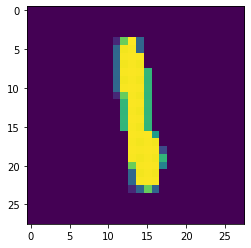

In [28]:
plt.imshow(image)

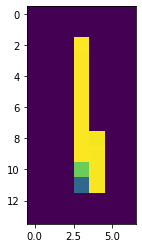

In [29]:
output, indices = POOLforward(image, pool_size, strides)
plt.imshow(output)

In [30]:
output

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.99607843, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.99607843, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.99607843, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.99607843, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.99607843, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.99607843, 0.98431373,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.99607843, 0.99215686,
        0.        , 0. 

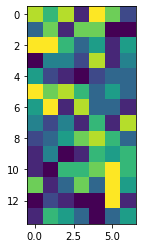

In [31]:
plt.imshow(target)

In [32]:
target

array([[0.8, 0.6, 0.8, 0.1, 0.9, 0.7, 0.2],
       [0.3, 0.7, 0.1, 0.7, 0.7, 0. , 0. ],
       [0.9, 0.9, 0.6, 0.3, 0.5, 0.1, 0.5],
       [0. , 0.4, 0.4, 0.2, 0.8, 0.1, 0.4],
       [0.5, 0.2, 0.1, 0. , 0.2, 0.3, 0.3],
       [0.9, 0.7, 0.8, 0.6, 0.3, 0.5, 0.3],
       [0.5, 0.9, 0.1, 0.8, 0.3, 0.3, 0.1],
       [0.4, 0.2, 0.4, 0.1, 0.6, 0.1, 0.8],
       [0.2, 0.3, 0.5, 0.7, 0.8, 0.6, 0.3],
       [0.1, 0.4, 0. , 0.1, 0.6, 0.5, 0.6],
       [0.1, 0. , 0.6, 0.6, 0.7, 0.9, 0.6],
       [0.7, 0.1, 0.3, 0.7, 0.3, 0.9, 0.5],
       [0. , 0.2, 0.1, 0. , 0. , 0.9, 0.1],
       [0.1, 0.6, 0.5, 0.3, 0. , 0.3, 0.5]])

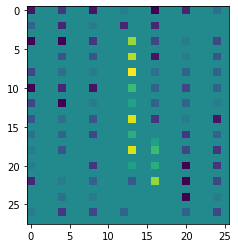

In [33]:
error = POOLbackward(output - target, indices, pool_size, strides)
plt.imshow(error)

In [34]:
error

array([[-0.8       ,  0.        ,  0.        ,  0.        , -0.6       ,
         0.        ,  0.        ,  0.        , -0.8       ,  0.        ,
         0.        ,  0.        , -0.1       ,  0.        ,  0.        ,
         0.        , -0.9       ,  0.        ,  0.        ,  0.        ,
        -0.7       ,  0.        ,  0.        ,  0.        , -0.2       ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.3       ,  0.        ,  0.        ,  0.        , -0.7       ,
         0.        ,  0.        ,  0.        , -0.1       ,  0.        ,
         0.        ,  0.        , -0.7       ,  0.        ,  0.        ,
       

### A simple CNN for MNIST

In [35]:
n = 6 ** 0.5

kernels1, strides1 = np.random.normal(0.1, (1 / 12) ** 0.5, (3, 2, 2)), (2, 2)
bias1 = np.random.normal(0.1, (1 / 196) ** 0.5, (14, 14))
kernels2, strides2 = np.random.normal(0.1, (1 / 200) ** 0.5, (6, 5, 5)), (1, 1)
bias2 = np.random.normal(0.1, (1 / 100) ** 0.5, (10, 10))
pool_size1, strides3 = (2, 2), (2, 2)
w1 = np.random.uniform(n / 45, 2 * n / 45, (20, 25))
b1 = np.random.uniform(n / 45, 2 * n / 45, (20))
w2 = np.random.uniform(n / 35, 2 * n / 35, (15, 20))
b2 = np.random.uniform(n / 35, 2 * n / 102, (15))
w3 = np.random.uniform(n / 25, 2 * n / 25, (10, 15))
b3 = np.random.uniform(n / 25, 2 * n / 47, (10))

In [36]:
def relu(x): 
    return np.maximum(0, x)


def softmax(x): 
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

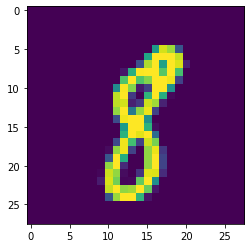

In [37]:
x = x_train[300]
plt.imshow(x)

In [38]:
def forward(x):
    L = [x]
    L.append(CNNforward(L[-1], kernels1, bias1, strides1))
    L.append(CNNforward(L[-1], kernels2, bias2, strides2))
    L.append(POOLforward(L[-1], pool_size1, strides3))
    L.append(L[-1][0].ravel())
    L.append(relu(np.dot(w1, L[-1]) + b1))
    L.append(relu(np.dot(w2, L[-1]) + b2))
    L.append(softmax(np.dot(w3, L[-1]) + b3))
    return L

In [39]:
def accuracy(x, y):
    ct = 0
    for xi, yi in zip(x, y):
        ct += np.argmax(forward(xi)[-1]) == np.argmax(yi)
    return 100 * ct / len(x)

In [40]:
def drelu(x):
    return x > 0

In [41]:
L = forward(x_train[300])[-2:]
w, dw = w3, np.outer((L[1] - y_train[300]), L[0])

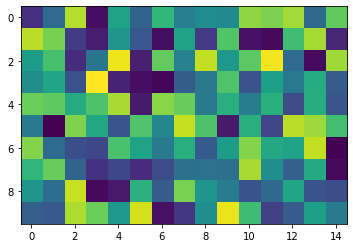

In [42]:
plt.imshow(w)

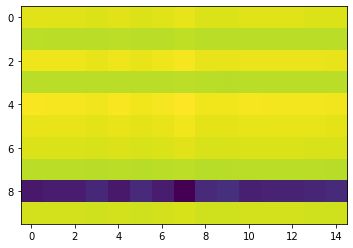

In [43]:
plt.imshow(dw)

In [44]:
print(f'test accuracy before training - {accuracy(x_test, y_test)} %')

test accuracy before training - 9.82 %


In [45]:
def backward(error, L, kernels1, bias1, strides1, kernels2, bias2, strides2, pool_size1, strides3, w1, b1, w2, b2, w3, b3):
    b3_grad = error
    w3_grad = np.outer(error, L[-2])
    error = np.dot(np.transpose(w3), error) * drelu(L[-2])
    b2_grad = error
    w2_grad = np.outer(error, L[-3])
    error = np.dot(np.transpose(w2), error) * drelu(L[-3])
    b1_grad = error
    w1_grad = np.outer(error, L[-4])
    error = POOLbackward(np.reshape(np.dot(np.transpose(w1), error), (5, 5)), L[-5][1], pool_size1, strides3)
    bias2_grad = error
    kernels2_grad, error = CNNbackward(error, L[-7], kernels2, strides2)
    bias1_grad = error
    kernels1_grad, error = CNNbackward(error, L[-8], kernels1, strides1)
    return kernels1_grad, bias1_grad, kernels2_grad, bias2_grad, w1_grad, b1_grad, w2_grad, b2_grad, w3_grad, b3_grad, error

In [46]:
lr = 2e-3
losses = []
for _ in tqdm(range(5)):
    epoch_loss = 0
    for i in range(60000):
        L = forward(x_train[i])
        error = L[-1] - y_train[i]
        epoch_loss += np.sum(error)
        kernels1_grad, bias1_grad, kernels2_grad, bias2_grad, w1_grad, b1_grad, w2_grad, b2_grad, w3_grad, b3_grad, error = backward(error, L, kernels1, bias1, strides1, kernels2, bias2, strides2, pool_size1, strides3, w1, b1, w2, b2, w3, b3)
        kernels1 -= lr * kernels1_grad
        bias1 -= lr * bias1_grad
        kernels2 -= lr * kernels2_grad
        bias2 -= lr * bias2_grad
        w1 -= lr * w1_grad
        b1 -= lr * b1_grad
        w2 -= lr * w2_grad
        b2 -= lr * b2_grad
        w3 -= lr * w3_grad
        b3 -= lr * b3_grad
    losses.append(epoch_loss / 60000)

100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [1:04:24<00:00, 772.81s/it]


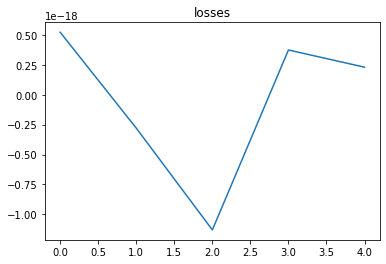

In [47]:
plt.title('losses')
plt.plot(losses)

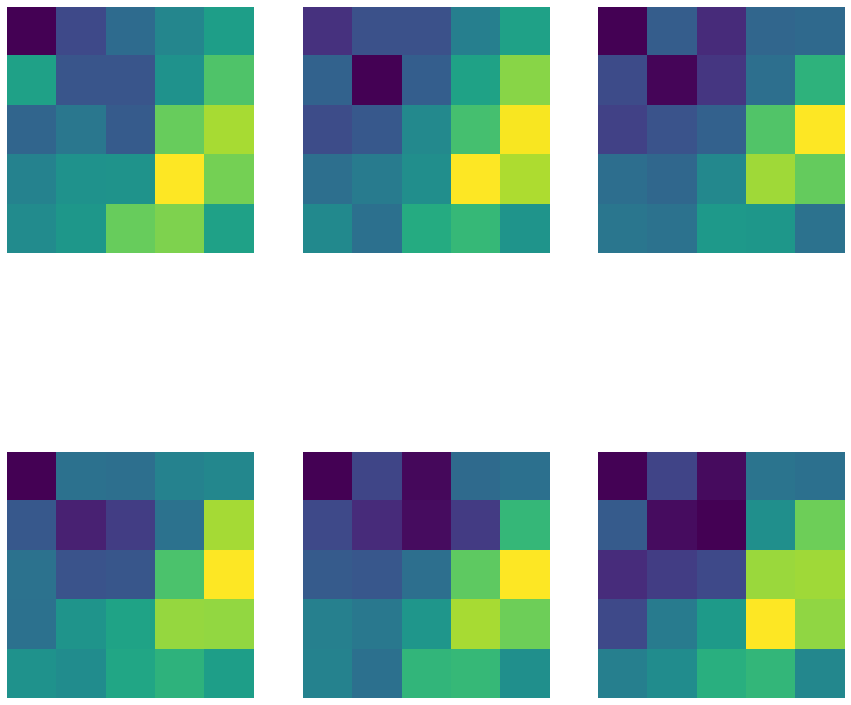

In [49]:
fig = plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.axis('off')
    plt.imshow(kernels2[i])
plt.show()

In [50]:
print(f'test accuracy after training - {accuracy(x_test, y_test)} %')

test accuracy after training - 91.43 %
